# **Sujet : Detection de formes circulaires dans une image**
**Plan**

1 : Déterminer si une forme est un circle

2 : Compter le nombre de circles(et autres formes) dans une image

Réalisé par **Mohamed ZEROUG** - enseignant en informatique / College Lasalle/Jan.2026

**Partie I : Déterminer si une forme est un circle**

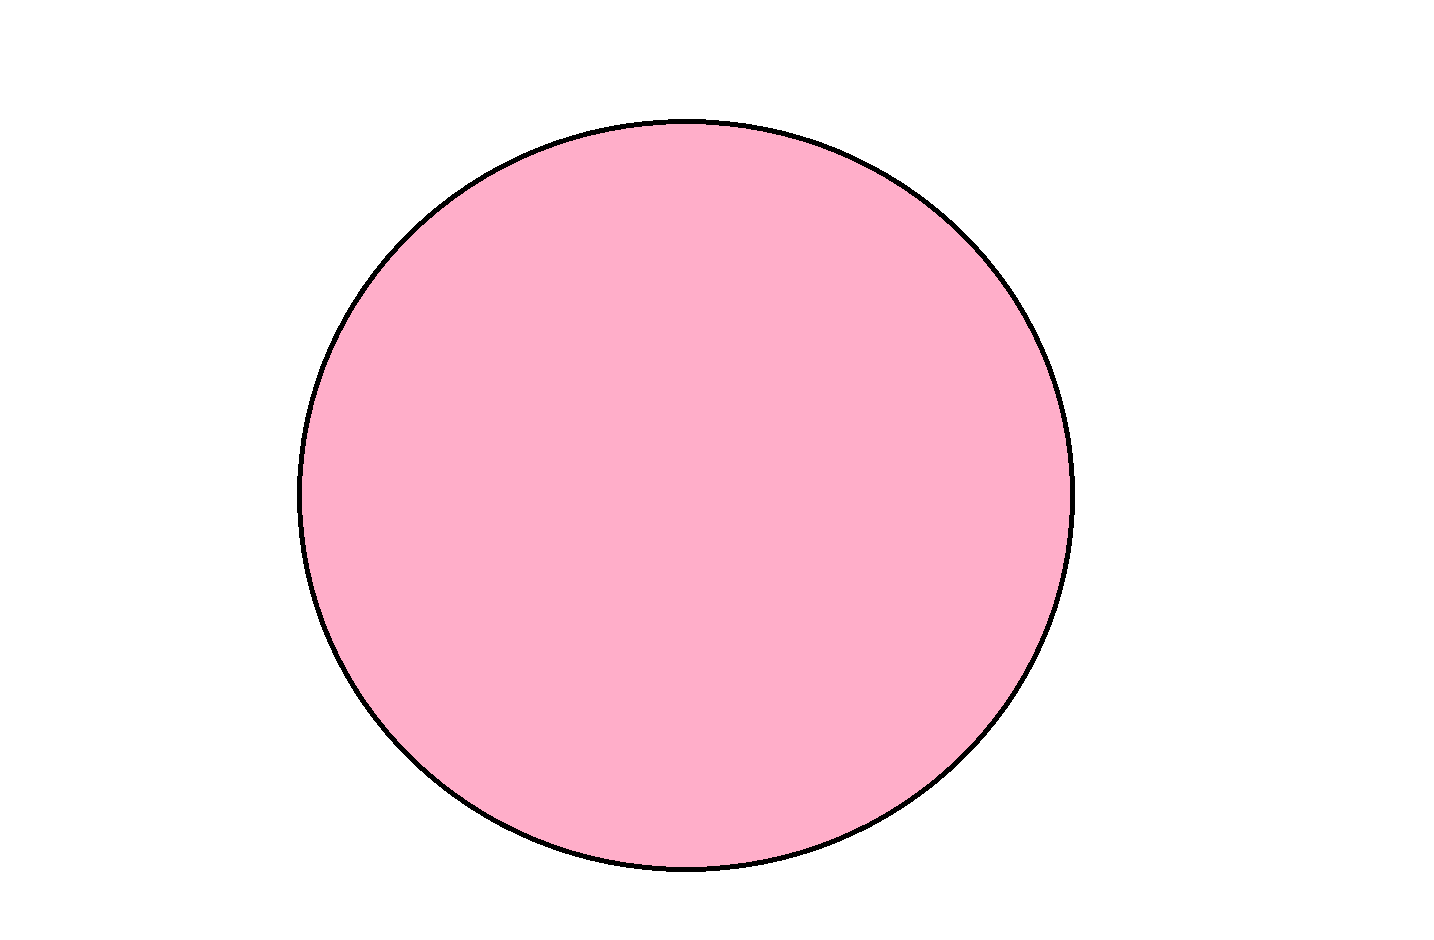

In [126]:
import cv2
import requests
import numpy as np
from google.colab.patches import cv2_imshow
url_image="https://raw.githubusercontent.com/zermoh/restapi/refs/heads/main/pictures/Circle_colored.png"
#url_image="https://raw.githubusercontent.com/zermoh/restapi/refs/heads/main/pictures/ellipse.png"
#url_image="https://raw.githubusercontent.com/zermoh/restapi/refs/heads/main/pictures/Circle_deformed.png"
#url_image="https://raw.githubusercontent.com/zermoh/restapi/refs/heads/main/pictures/Circle_deformed_3.png"
#url_image="https://raw.githubusercontent.com/zermoh/restapi/refs/heads/main/detect_form/Circle_02.png"


# Charger l'image dans Google Colab et convertir en format OpenCV

response = requests.get(url_image, stream=True).raw
data_bytes = bytearray(response.read())
image = np.asarray(data_bytes, dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)               ##Convertir l'image en cv2
# Afficher l'image
cv2_imshow(image)

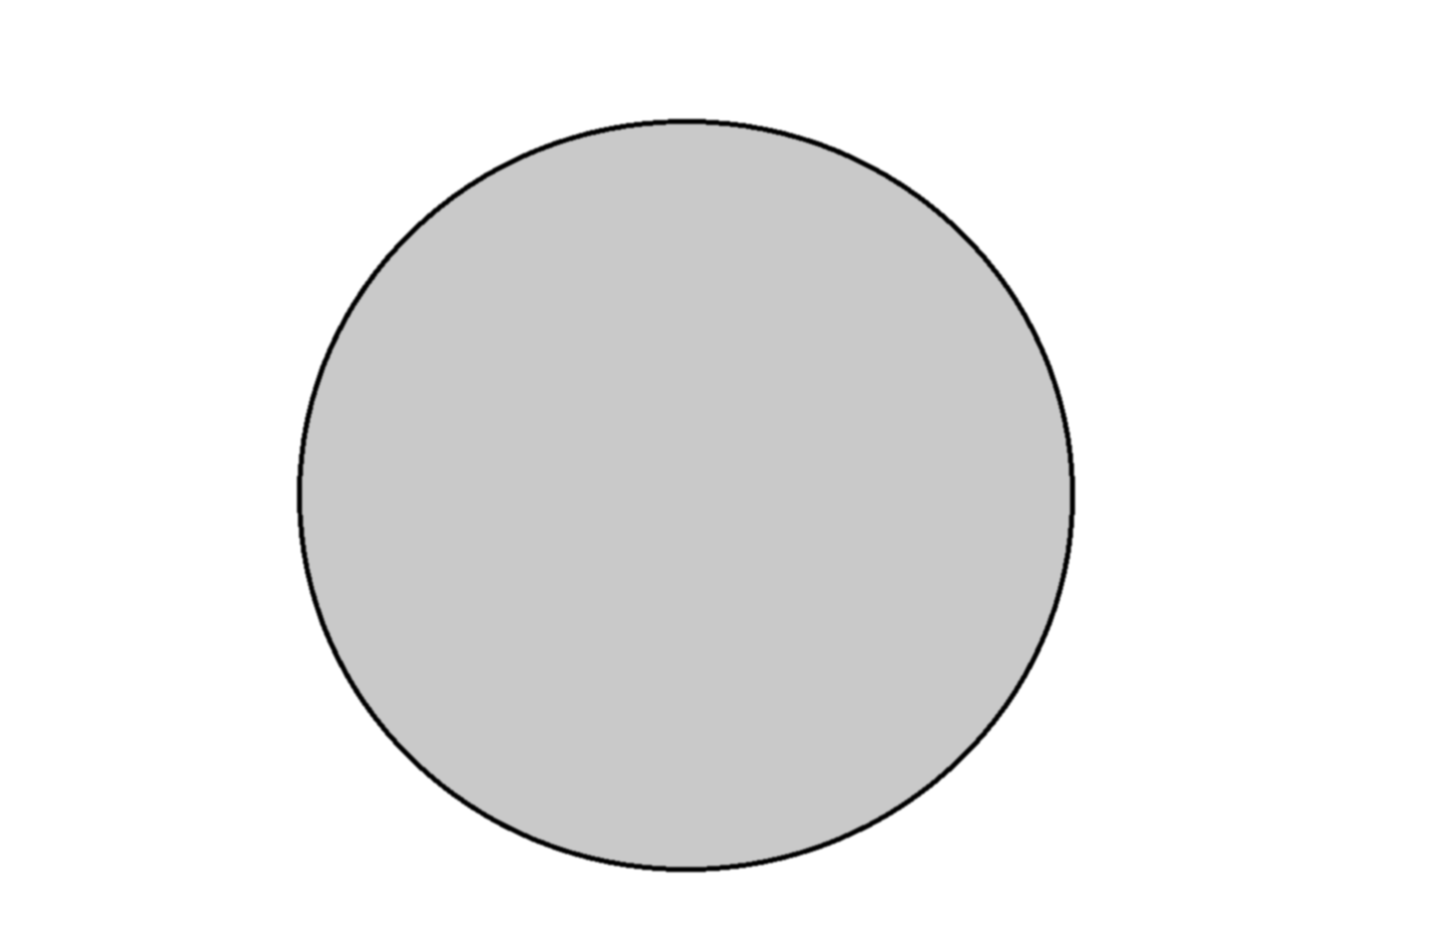

In [127]:
#Creer une copie de l'image, la convertir en grascale et reduire le bruit
output = image.copy()

gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(gray)

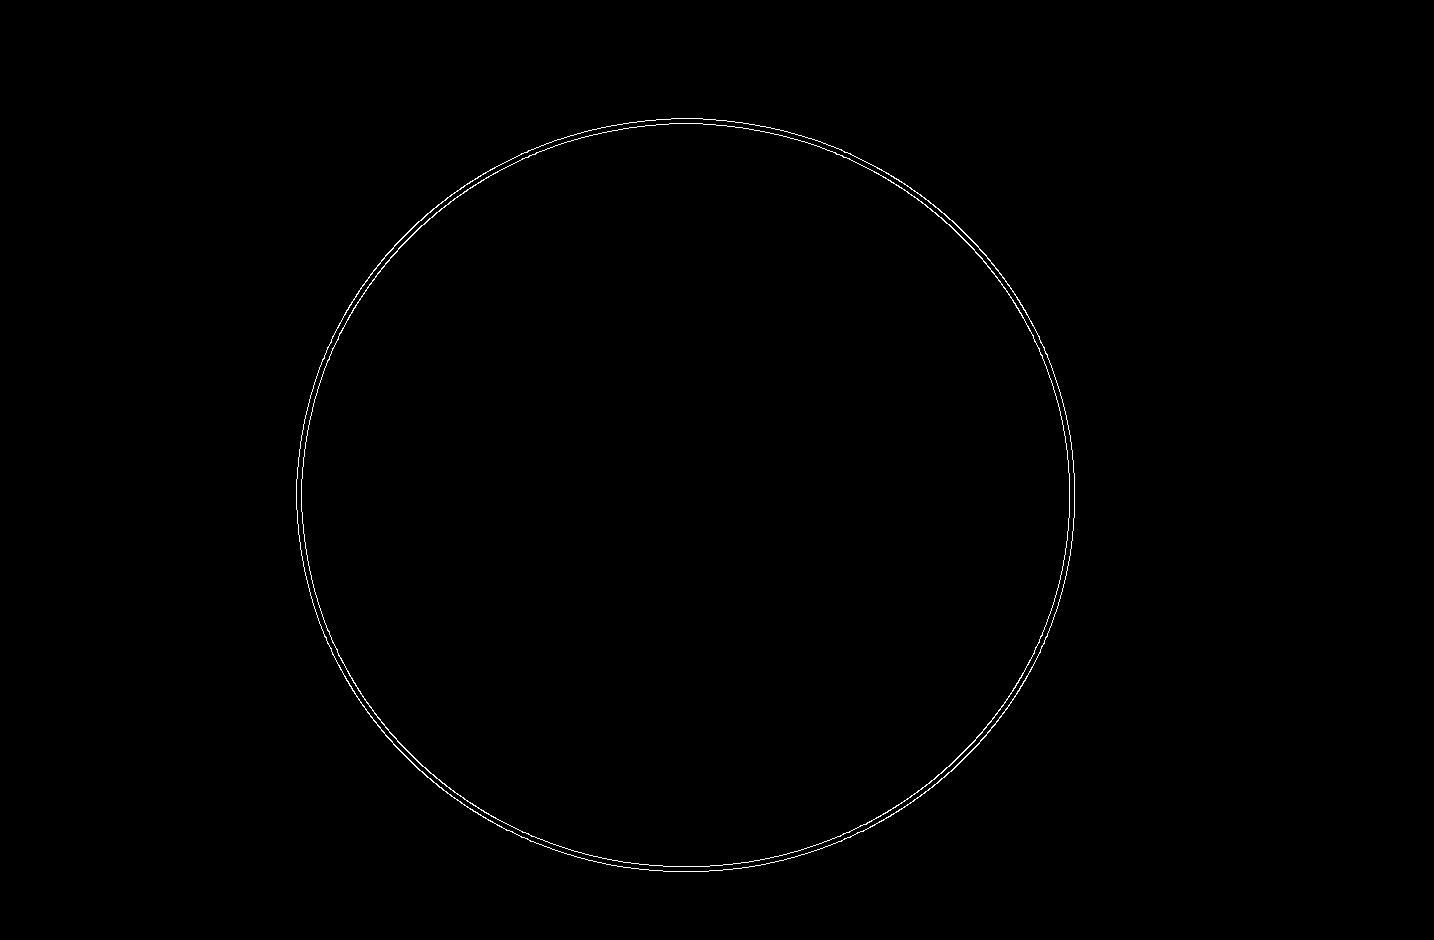

In [128]:
#Desiner le(s) contour(s) de l'image
edges = cv2.Canny(gray,200, 255)
cv2_imshow(edges)

In [129]:
#Determiner les contours sur l'image
#Il se peut qu'on a plusieurs contours (petits contours), alors
#On va chercher le(s) contour(s) qui a la plus grande surface
#Afficher le perimetre et la surface reelle
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
num_contours = len(contours)
print("Number of contours:", num_contours)
areas = [cv2.contourArea(c) for c in contours]
max_index = areas.index(max(areas))
max_contour = contours[max_index]
max_contour_area = areas[max_index]
max_contour_perimeter = cv2.arcLength(max_contour, True)
print("Perimetre et superficie reelles du plus grand contour:", max_contour_perimeter,max_contour_area)

Number of contours: 1
Perimetre et superficie reelles du plus grand contour: 2537.1353302001953 460291.0


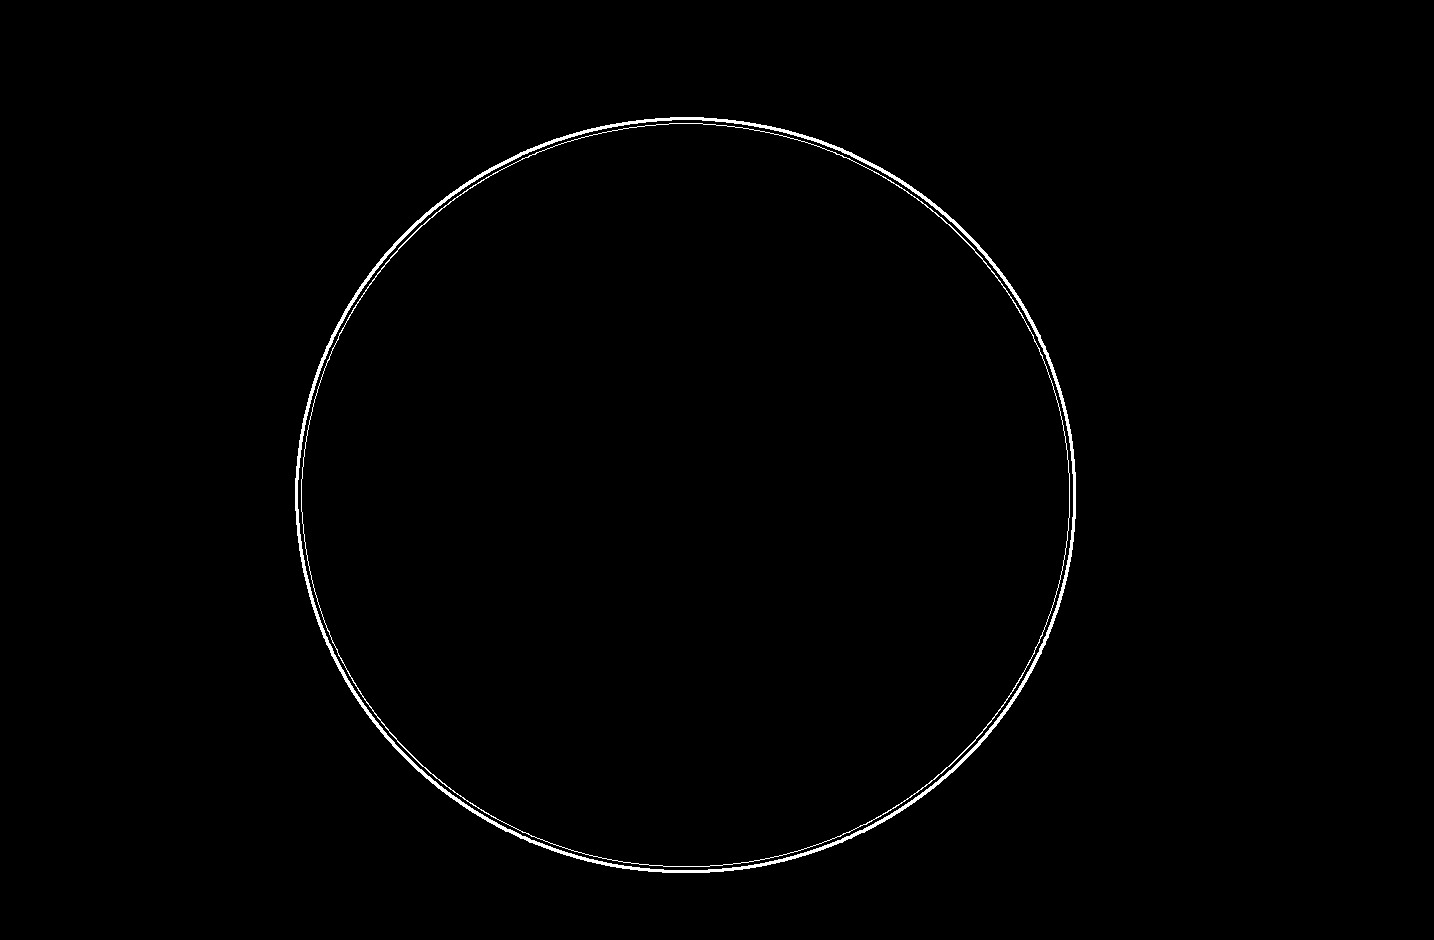

In [117]:
# Marquer la forme qui a le plus grand contour
cv2.drawContours(edges, [max_contour], -1, (255,255,255), 2)
cv2_imshow(edges)

In [130]:
#calculer le parametre circularity et le ratio pour verifier si la forme est circulaire ou pas

#calculer et afficher la circularity : Circularity = 4*pi*area/perimeter*perimeter
circularity = 4 * np.pi * max_contour_area / (max_contour_perimeter * max_contour_perimeter)
print("Circularity:", circularity)

#Determiner le rayon, le perimetre et la superficie theorique de la forme
(x,y), radius = cv2.minEnclosingCircle(max_contour)
circle_area = np.pi * radius * radius
circle_perimeter = 2*np.pi*radius
print("Rayon :", radius)
print("Perimetre et superficie theorique: ", circle_perimeter,circle_area)

area_ratio = max_contour_area / circle_area
print("Ratio",area_ratio)

Circularity: 0.8985765512415588
Rayon : 389.48907470703125
Perimetre et superficie theorique:  2447.232031506191 476585.0697723774
Ratio 0.9658107842527262


La forme est un cercle


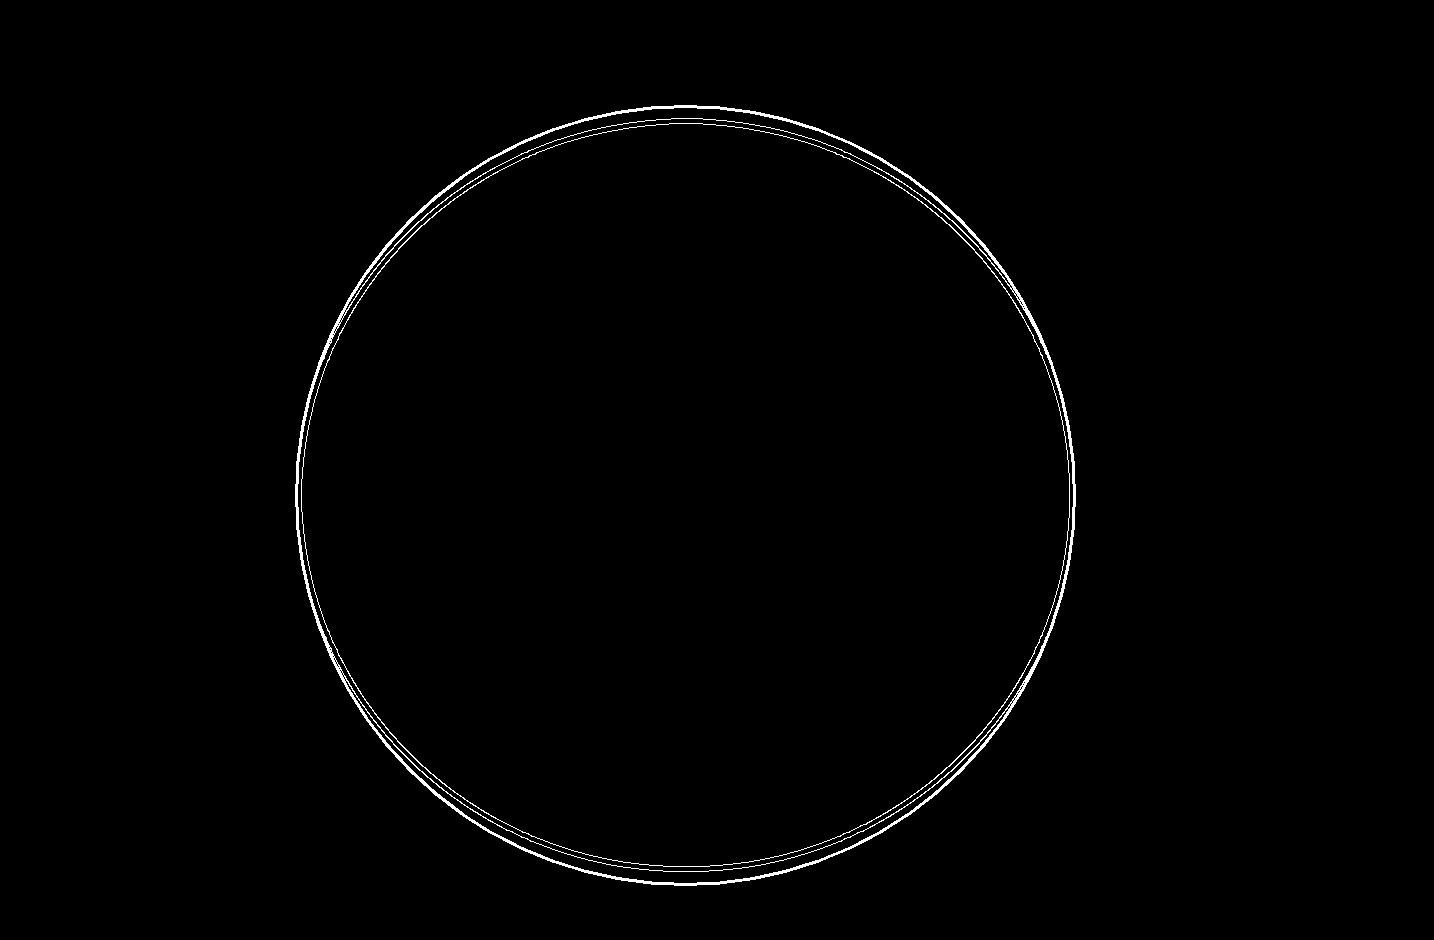

In [131]:

#Verifier si la forme est un cercle : area_ratio >0.90 et 0.85<circularity <1.1


#Desiner le cercle theorique (optionnelle)
center = (int(x), int(y))
radius = int(radius)
cv2.circle( edges, center, radius,255,2)


if area_ratio > 0.90 and 0.85 < circularity < 1.1:
    print("La forme est un cercle")
else:
    print("La forme n'est pas un cercle")

cv2_imshow(edges)

**Partie II : Compter le nombre de circles (et autres formes) dans une image**

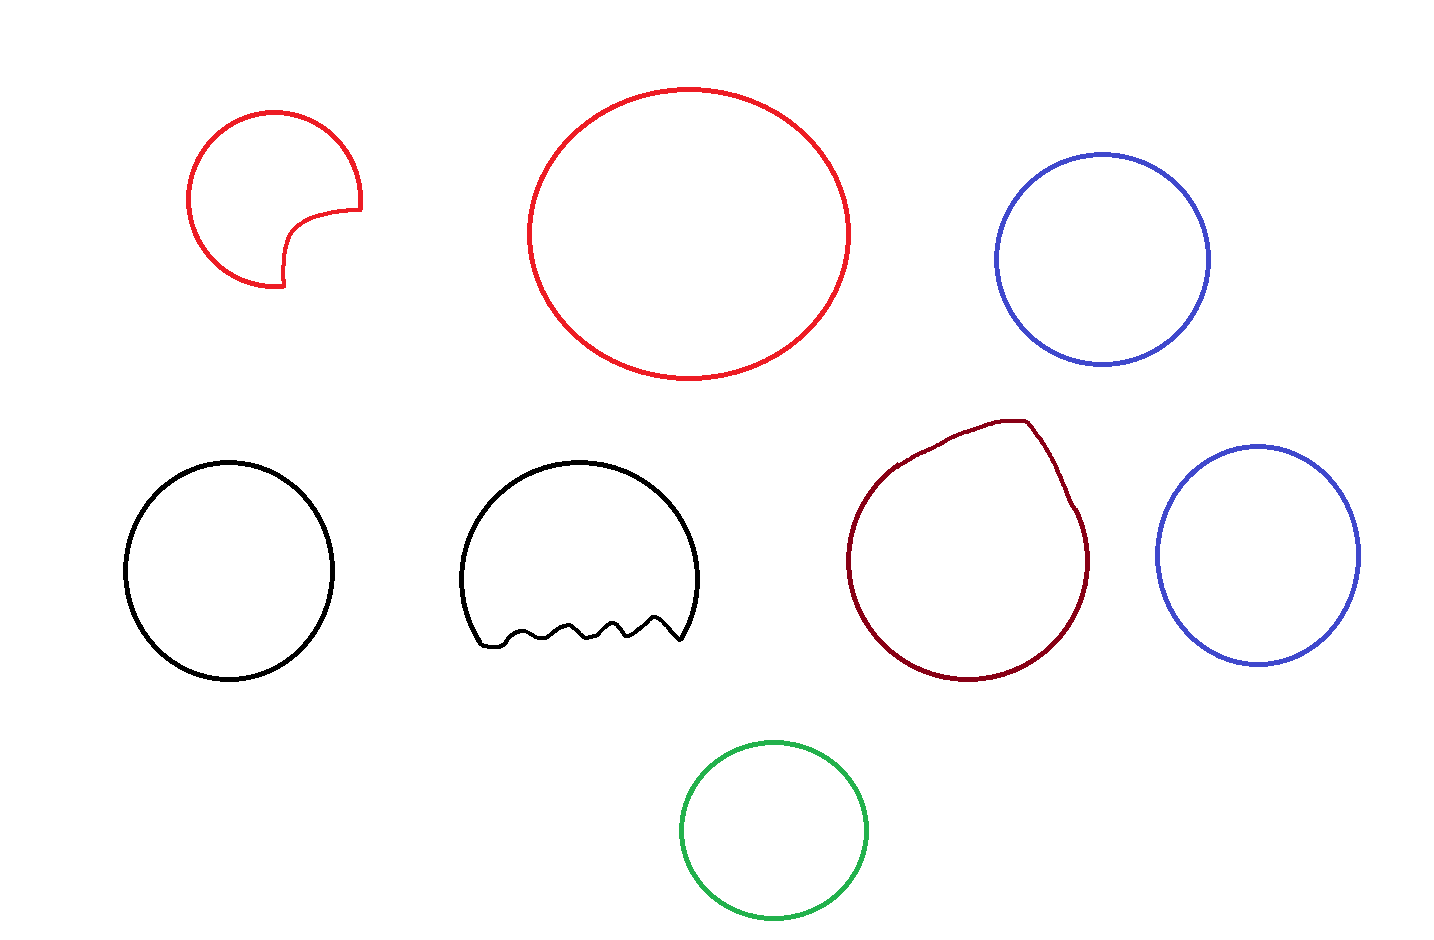

In [132]:
import cv2
import requests
import numpy as np
from google.colab.patches import cv2_imshow
#url_image="https://raw.githubusercontent.com/zermoh/restapi/refs/heads/main/detect_form/many_circles.png"
url_image="https://raw.githubusercontent.com/zermoh/restapi/refs/heads/main/detect_form/many_deformed_circles.png"
#url_image="https://raw.githubusercontent.com/zermoh/restapi/refs/heads/main/detect_form/many_deformed_circles_1.png"


# Charger l'image dans Google Colab et convertir en format OpenCV

response = requests.get(url_image, stream=True).raw
data_bytes = bytearray(response.read())
image = np.asarray(data_bytes, dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)               #Convertir l'image en cv2
# Afficher l'image
cv2_imshow(image)


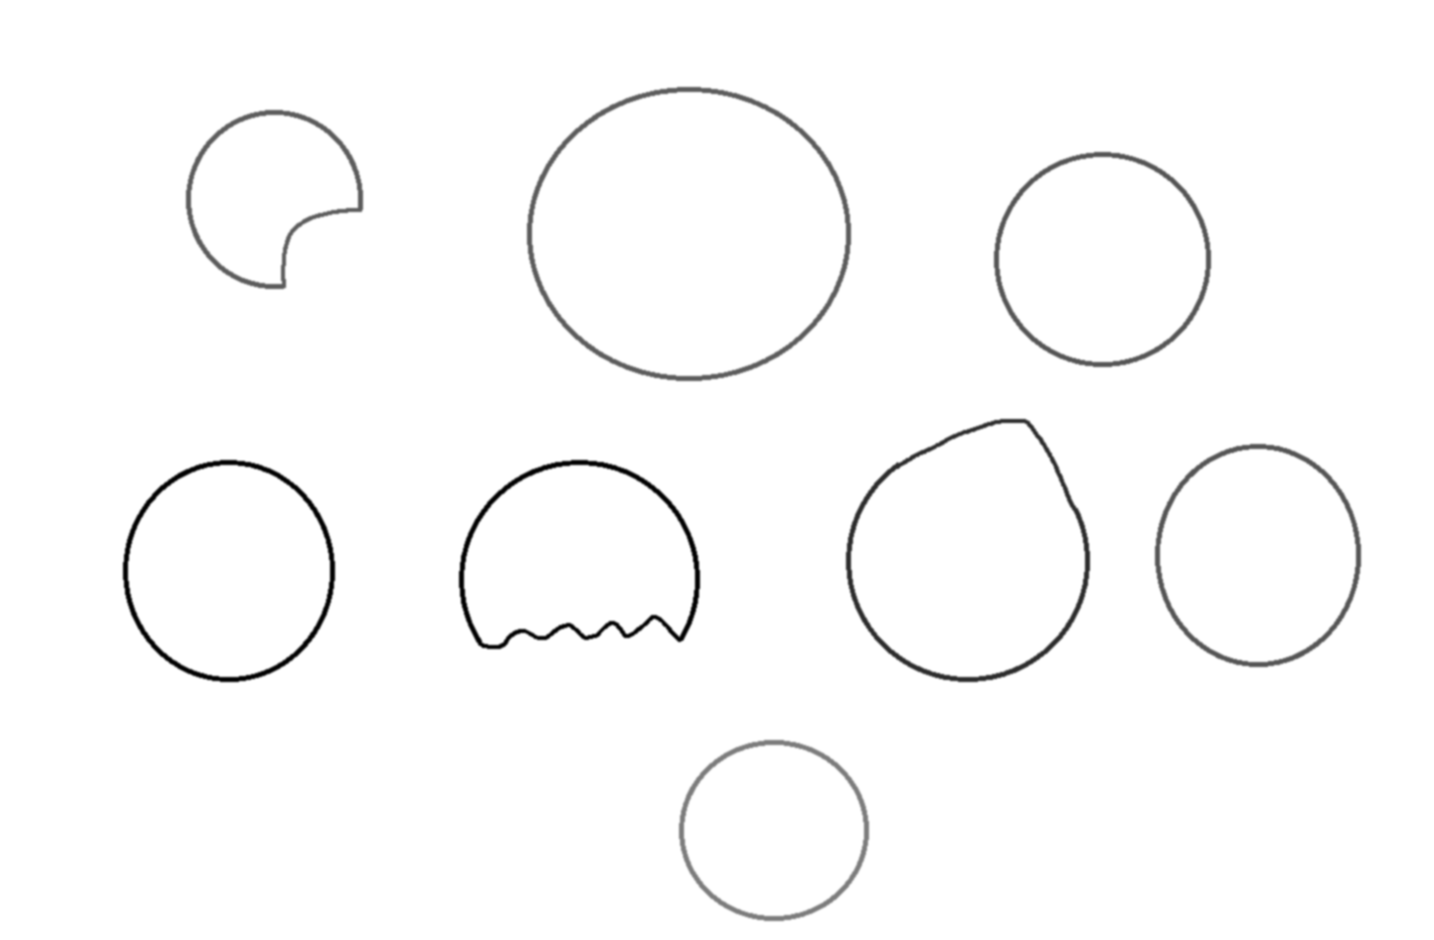

In [121]:
#Creer une copie de l'image, la convertir en grascale et reduire le bruit
output = image.copy()

gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(gray)

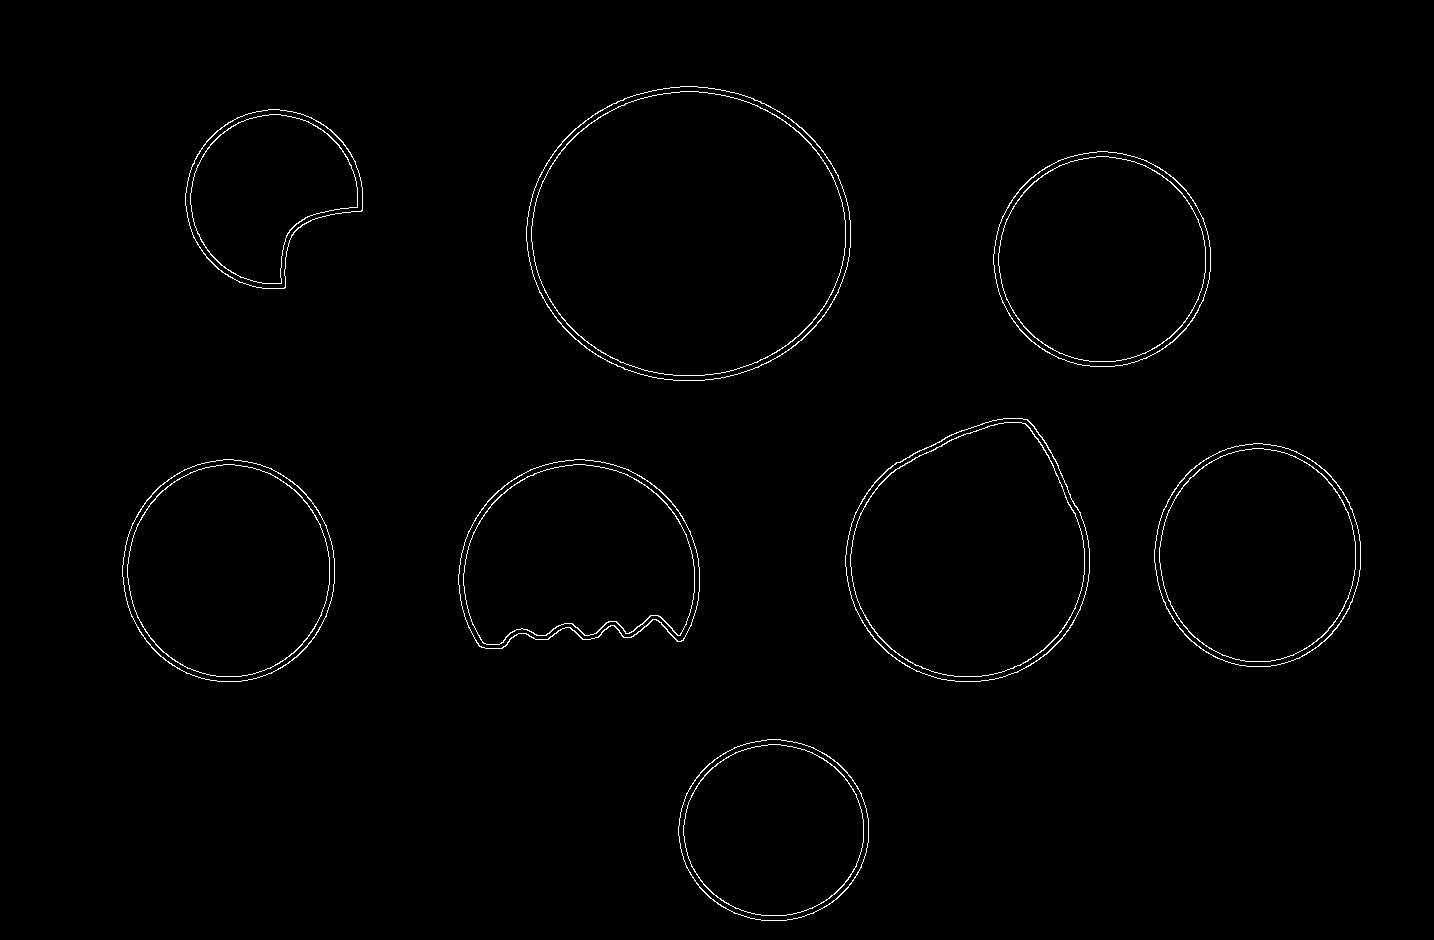

In [122]:
#Desiner le(s) contour(s) de l'image
edges = cv2.Canny(gray,200, 255)
cv2_imshow(edges)

In [123]:
#Determiner le nombre de contours sur l'image
#Determiner le nombre de formes circulaires et non circulaires

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
num_contours = len(contours)
print("Nombre de contours:", num_contours)
num_circles,num_non_circles = 0,0
for cnt in contours:
    real_area = cv2.contourArea(cnt)
    real_perimeter = cv2.arcLength(cnt, True)
    circularity = 4 * np.pi * real_area / (real_perimeter * real_perimeter)
    (x,y), radius = cv2.minEnclosingCircle(cnt)
    circle_area = np.pi * radius * radius
    circle_perimeter = 2*np.pi*radius
    area_ratio = real_area / circle_area
    if area_ratio > 0.90 and 0.85 < circularity < 1.1:
        num_circles += 1
    else:
       num_non_circles+=1
print("le nombre de formes circulaire: ",num_circles)
print("le nombre de forne non circulaire: ",num_non_circles)

Nombre de contours: 8
le nombre de formes circulaire:  5
le nombre de forne non circulaire:  3


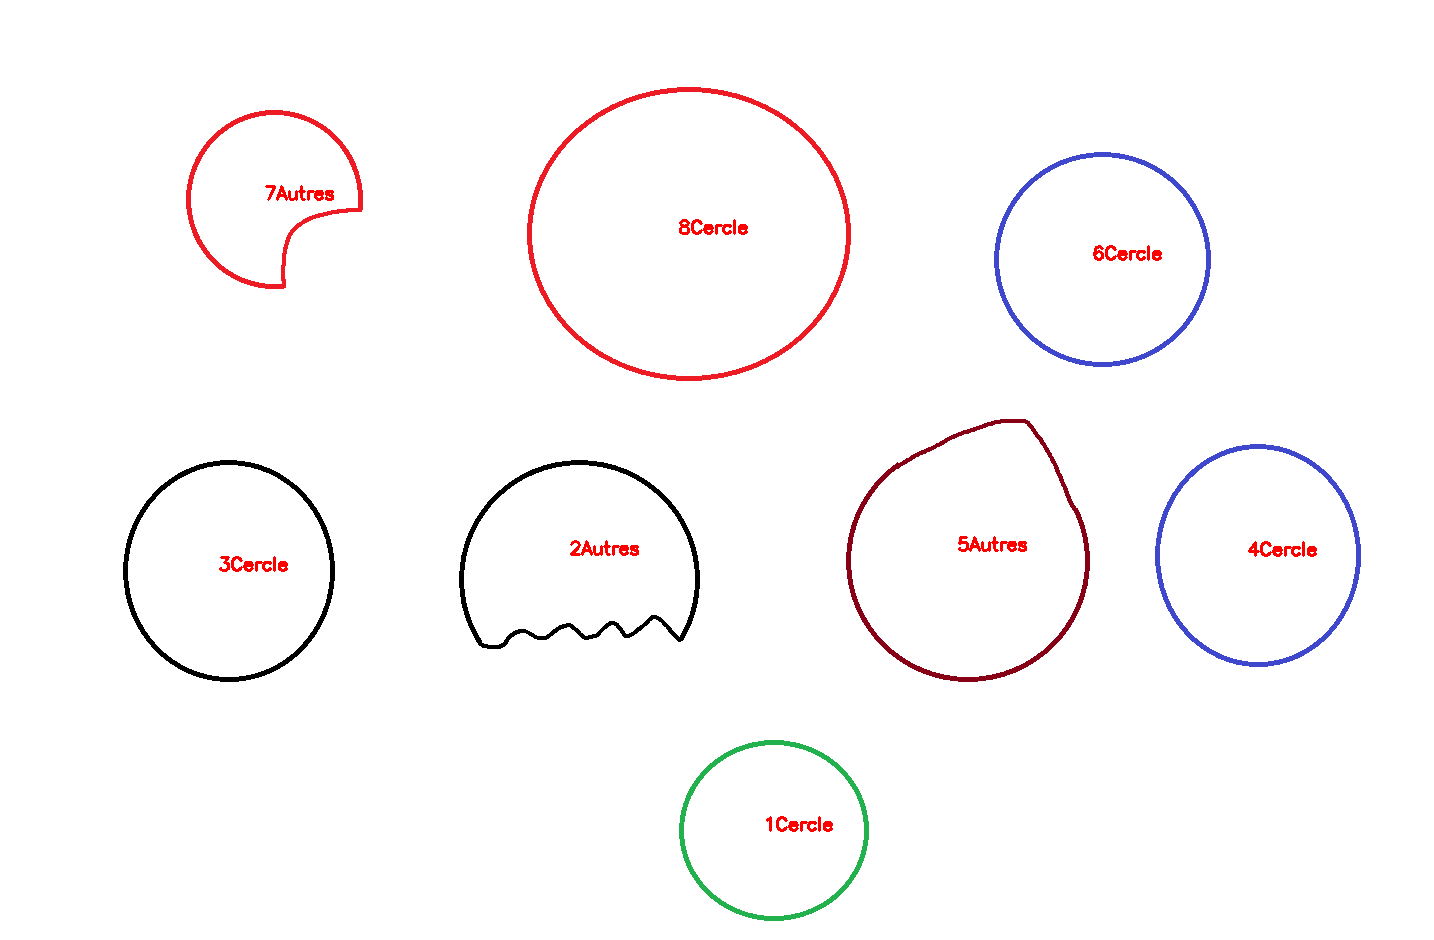

In [124]:
#Marquer les formes circulaires et non circulaires
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
num_circles,num_non_circles,counter = 0,0,1
for cnt in contours:
    real_area = cv2.contourArea(cnt)
    real_perimeter = cv2.arcLength(cnt, True)
    circularity = 4 * np.pi * real_area / (real_perimeter * real_perimeter)
    (x,y), radius = cv2.minEnclosingCircle(cnt)
    circle_area = np.pi * radius * radius
    circle_perimeter = 2*np.pi*radius
    area_ratio = real_area / circle_area
    if area_ratio > 0.90 and 0.85 < circularity < 1.1:
        shape_type='Cercle'
    else:
       shape_type='Autres'

    x, y, w, h = cv2.boundingRect(cnt)
    cx = x + w // 2
    cy = y + h // 2
    cv2.putText(output,str(counter)+shape_type,(cx-10, cy),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0, 0, 255),2)
    counter+=1
cv2_imshow(output)